In [17]:
import pandas as pd
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from itertools import cycle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import numpy as np
from xgboost import XGBClassifier
import warnings
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import log_loss, make_scorer
from sklearn.preprocessing import label_binarize

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix,roc_auc_score,recall_score,precision_score,accuracy_score,f1_score,roc_curve,auc
warnings.filterwarnings("ignore")



In [2]:
train_data = pd.read_csv('traindata.csv')
test_data = pd.read_csv('testdata.csv')

In [3]:
train_data.drop(['Unnamed: 0','category'],axis = 1,inplace=True)
test_data.drop(['Unnamed: 0','category'],axis = 1,inplace=True)


In [4]:
def age_group(age):
    if age == '0-24':
        return 0
    elif age == '25-32':
        return 1
    elif age == '33-45':
        return 2
    else:
        return 3

In [5]:
train_data['age_group'] = train_data['age_group'].apply(lambda x : age_group(x) )
test_data['age_group'] = test_data['age_group'].apply(lambda x: age_group(x))
train_data['gender'] = train_data['gender'].apply(lambda x: 0 if x == 'M' else 1)
test_data['gender'] = test_data['gender'].apply(lambda x: 0 if x=='M' else 1)

In [6]:
age_train = train_data['age_group'].values
gender_train = train_data['gender'].values
age_test = test_data['age_group'].values
gender_test = test_data['gender'].values
X_train = train_data.drop(['device_id','gender','train_test_flag','age_group'],axis = 1)
X_test = test_data.drop(['device_id','gender','train_test_flag','age_group'],axis = 1)

### 1. LogisticRegression (Started with simple model)

LogisticRegression on Test data 
0.39257428314813575
[[    0 12013  4851     0]
 [    0 30776 23387     0]
 [    0 23334 22112     0]
 [    0  8962  9286     0]]
Recall 0.39257428314813575
F1-Score 0.39257428314813575
Preicsion 0.39257428314813575


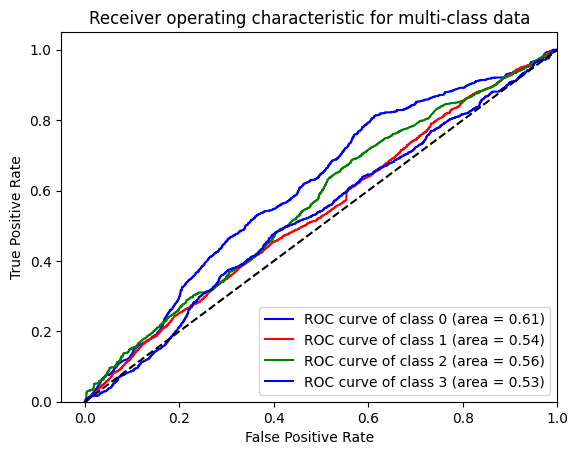

LogisticRegression on Training  data 
0.4216854913948826
[[    0 36867 13204     0]
 [    0 97375 58853     0]
 [    0 70349 72571     0]
 [    0 27116 26681     0]]
Recall 0.4216854913948826
F1-Score 0.4216854913948826
Preicsion 0.4216854913948826


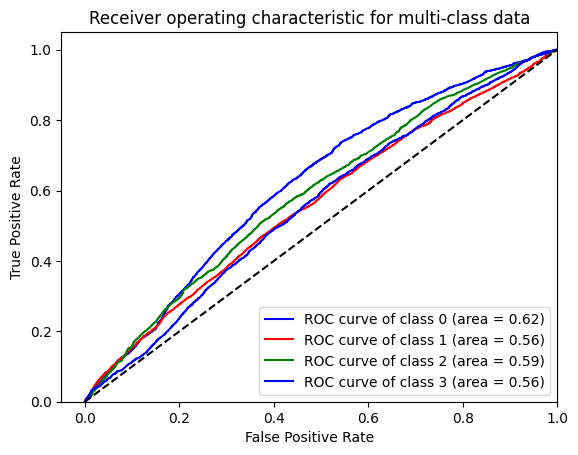

In [18]:
# diclare the logistic model
model = LogisticRegression(random_state=41)
# train the model on the data
model.fit(X_train, age_train)
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)
y_test_bin = label_binarize(age_test, classes=[0, 1, 2,3])
n_classes = y_test_bin.shape[1]
print("LogisticRegression on Test data ")
print(accuracy_score(age_test, y_pred))
# Plot and print confusion matrix
cnf_matrix = confusion_matrix(age_test, y_pred)
print(cnf_matrix)
print('Recall',recall_score(age_test, y_pred,average='micro'))
print('F1-Score',f1_score(age_test, y_pred,average='micro'))
print('Preicsion',precision_score(age_test, y_pred,average='micro'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()



print("LogisticRegression on Training  data ")
y_pred = model.predict(X_train)
y_score = model.predict_proba(X_train)
y_train_bin = label_binarize(age_train, classes=[0, 1, 2,3])
n_classes = y_test_bin.shape[1]
print(accuracy_score(age_train, y_pred))
# Plot and print confusion matrix
cnf_matrix = confusion_matrix(age_train, y_pred)
print(cnf_matrix)
print('Recall',recall_score(age_train, y_pred ,average='micro'))
print('F1-Score',f1_score(age_train, y_pred,average='micro'))
print('Preicsion',precision_score(age_train, y_pred,average='micro'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


RandomForestClassifier on Test data 
0.3470728394236979
[[ 2089  8513  5027  1235]
 [ 5159 25868 18751  4385]
 [ 4104 20096 17043  4203]
 [ 1322  8140  7028  1758]]
Recall 0.3470728394236979
F1-Score 0.3470728394236979
Preicsion 0.3470728394236979


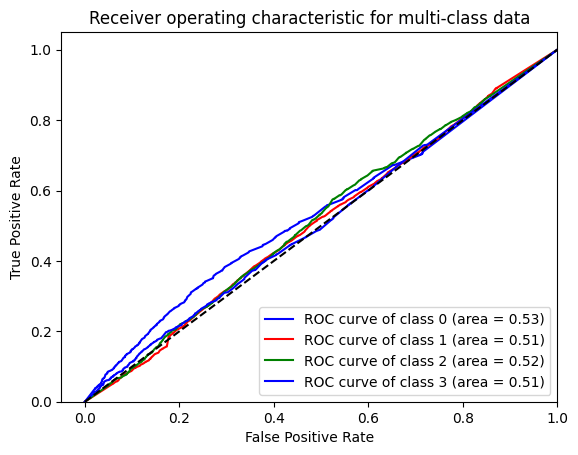

RandomForestClassifier on Training  data 
0.8682881076681819
[[ 38314   6416   4576    765]
 [  1744 141443  11271   1770]
 [  1506  11623 127929   1862]
 [   653   5374   5522  42248]]
Recall 0.8682881076681819
F1-Score 0.8682881076681819
Preicsion 0.8682881076681819


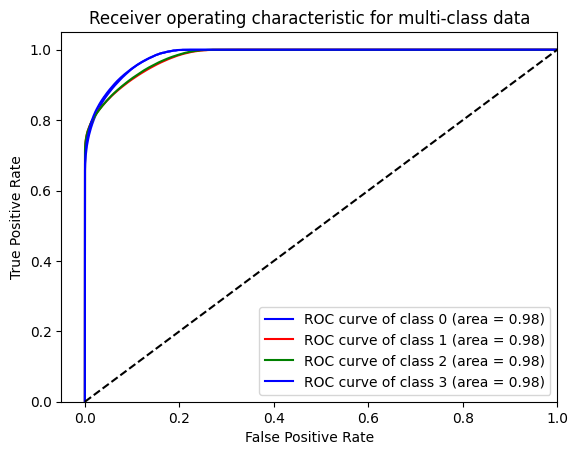

In [19]:
# diclare the logistic model
model = RandomForestClassifier(random_state=41)
# train the model on the data
model.fit(X_train, age_train)
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)
y_test_bin = label_binarize(age_test, classes=[0, 1, 2,3])
n_classes = y_test_bin.shape[1]
print("RandomForestClassifier on Test data ")
print(accuracy_score(age_test, y_pred))
# Plot and print confusion matrix
cnf_matrix = confusion_matrix(age_test, y_pred)
print(cnf_matrix)
print('Recall',recall_score(age_test, y_pred,average='micro'))
print('F1-Score',f1_score(age_test, y_pred,average='micro'))
print('Preicsion',precision_score(age_test, y_pred,average='micro'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()



print("RandomForestClassifier on Training  data ")
y_pred = model.predict(X_train)
y_score = model.predict_proba(X_train)
y_train_bin = label_binarize(age_train, classes=[0, 1, 2,3])
n_classes = y_test_bin.shape[1]
print(accuracy_score(age_train, y_pred))
# Plot and print confusion matrix
cnf_matrix = confusion_matrix(age_train, y_pred)
print(cnf_matrix)
print('Recall',recall_score(age_train, y_pred ,average='micro'))
print('F1-Score',f1_score(age_train, y_pred,average='micro'))
print('Preicsion',precision_score(age_train, y_pred,average='micro'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBClassifier on Test Dataset
(134721, 4)
(134721, 4)


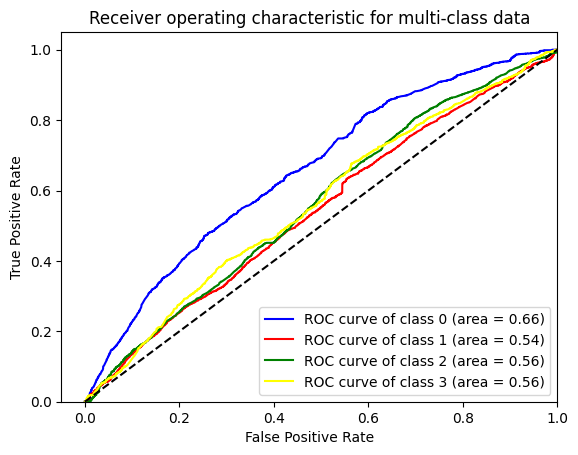

XGBClassifier on Train Dataset


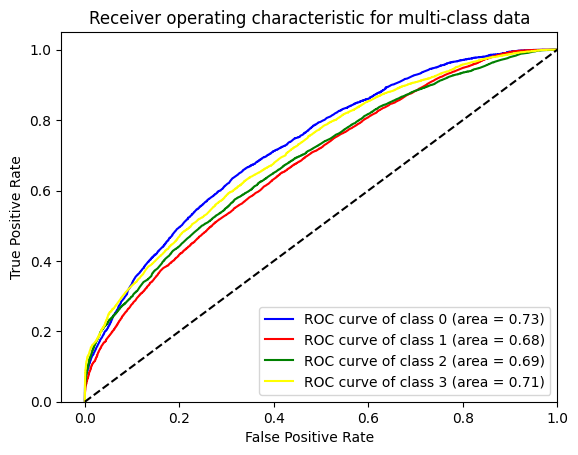

In [23]:
x_cfl=XGBClassifier(verbosity=0)
n_folds = 3
prams={
    'learning_rate':[0.01,0.03,0.05],
     'n_estimators':[100,200],
     'max_depth':[3,5],
    'colsample_bytree':[0.1,0.3,0.5],
    'subsample':[0.1,0.3,0.5]
}

LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
random_cfl=RandomizedSearchCV(x_cfl,prams,verbose=1,n_jobs=-1,return_train_score=True,scoring=LogLoss)
random_cfl.fit(X_train,age_train)
print("XGBClassifier on Test Dataset")
y_score = random_cfl.predict_proba(X_test)
print(y_score.shape)
y_test_bin = label_binarize(age_test, classes=[0,1,2,3])
print(y_test_bin.shape)
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()



print("XGBClassifier on Train Dataset")
y_score = random_cfl.predict_proba(X_train)
y_train_bin = label_binarize(age_train, classes=[0, 1, 2,3])
n_classes = y_train_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [27]:
clf1 = LogisticRegression()
clf2 = random_cfl.best_estimator_ # just for demo have taken 10 trees 
xgb = XGBClassifier()

stacking_demo = StackingCVClassifier(classifiers=[clf1, clf2], meta_classifier=xgb, use_probas=True, cv=3)

In [29]:
sclf_fit = stacking_demo.fit(X_train, age_train)
print("stacking on Test Dataset")

y_pred = sclf_fit.predict(X_test)
print("Accuracy:",accuracy_score(y_pred,age_test))
print('Recall',recall_score(age_test, y_pred,average='micro'))
print('F1-Score',f1_score(age_test, y_pred,average='micro'))
print('Preicsion',precision_score(age_test, y_pred,average='micro'))

print("stacking on Train Dataset")

y_pred = sclf_fit.predict(X_train)
print("Accuracy:",accuracy_score(y_pred,age_train))
print('Recall',recall_score(age_train, y_pred,average='micro'))
print('F1-Score',f1_score(age_train, y_pred,average='micro'))
print('Preicsion',precision_score(age_train, y_pred,average='micro'))


stacking on Test Dataset
Accuracy: 0.3778995108409231
Recall 0.3778995108409231
F1-Score 0.37789951084092305
Preicsion 0.3778995108409231
stacking on Train Dataset
Accuracy: 0.517396331659289
Recall 0.517396331659289
F1-Score 0.517396331659289
Preicsion 0.517396331659289


In [30]:
final_fit = random_cfl.best_estimator_.fit(X_train, age_train)

In [31]:
import pickle
pickle.dump(final_fit, open('model_age_with_event.pkl', 'wb'))
